In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import collections
import random

In [5]:
from sklearn.metrics import roc_curve, plot_roc_curve, RocCurveDisplay, auc, roc_auc_score

In [6]:
import utils

### Threshold Vote (Full Dataset)

In [8]:
threshold_full_tpr = np.load("data/threshold-vote-full-tprs.npy")
threshold_full_fpr = np.load("data/threshold-vote-full-fprs.npy")

In [13]:
auc_score_threshold = auc(threshold_full_fpr, threshold_full_tpr)
print(auc_score_threshold)

0.9413449324108675


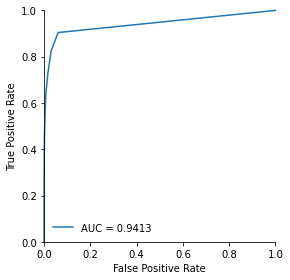

In [14]:
fig, ax = plt.subplots()

sns.lineplot(x=threshold_full_fpr, y=threshold_full_tpr, clip_on=False)
plt.axis("square")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

legend_labels = ["AUC = {}".format(round(auc_score_threshold, 4))]

ax.legend(legend_labels, frameon=False)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
sns.despine()
plt.tight_layout()
plt.savefig("majority-vote.pdf")

In [7]:
rf_tpr = np.load("data/rf-oob-tpr.npy")
rf_fpr = np.load("data/rf-oob-fpr.npy")

In [8]:
auc_score_rf = auc(rf_fpr, rf_tpr)
print(auc_score_rf)

0.998622986868749


### Combined Plot

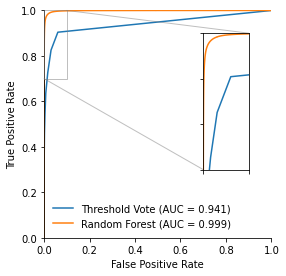

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(threshold_full_fpr, threshold_full_tpr)
ax.plot(rf_fpr, rf_tpr)
plt.axis("square")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# scaling factor
magnification = 2
# unscaled size of top-right area to be highlighted
x_size = .1
y_size = .3
# top right corner of magnified area
x_pos = .9
y_pos = .9
# create inset axes that will contain copy of the plot
axins = ax.inset_axes([x_pos-magnification*x_size, y_pos-magnification*y_size, magnification*x_size, magnification*y_size])
axins.plot(threshold_full_fpr, threshold_full_tpr)
axins.plot(rf_fpr, rf_tpr)
# specify which area to display
axins.set_xlim(0, x_size)
axins.set_ylim(1-y_size, 1)
# disable tick labels
axins.set_xticklabels('')
axins.set_yticklabels('')
# highlight that area is zoomed-in cutout
ax.indicate_inset_zoom(axins)

legend_labels = [
    "Threshold Vote (AUC = {})".format(round(auc_score_threshold, 3)),
    "Random Forest (AUC = {})".format(round(auc_score_rf, 3))
]
ax.legend(legend_labels, frameon=False)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

sns.despine(ax=ax)
plt.tight_layout()
plt.savefig("threshold-vote-rf-comparison.pdf")

### Plot TPR/FPR of the individual heuristics

In [9]:
individual_heuristics = [(0.026317, 0.305982),
 (0.020221, 0.2391),
 (0.030544, 0.236927),
 (0.011745, 0.467048),
 (0.006165, 0.419994),
 (0.005068, 0.374834),
 (0.00557, 0.302347),
 (0.004961, 0.211132),
 (0.000501, 0.106845),
 (0.107035, 0.263076),
 (0.12945, 0.283425),
 (0.06131, 0.100237),
 (0.000551, 0.139837),
 (0.01352, 0.239226),
 (0.025319, 0.117414),
 (0.008099, 0.041868),
 (0.003765, 0.245298),
 (0.002925, 0.306533),
 (0.002698, 0.075313),
 (0.020918, 0.190708),
 (0.000763, 0.02142),
 (0.052919, 0.261993),
 (0.022907, 0.294188),
 (0.015247, 0.268645),
 (0.007178, 0.06311),
 (0.019025, 0.180882)]

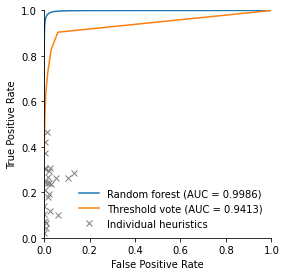

In [19]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(rf_fpr, rf_tpr)
ax.plot(threshold_full_fpr, threshold_full_tpr)


for _x, _y in individual_heuristics:
    ax.plot(_x, _y, "x", color="0.5")

plt.axis("square")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


legend_labels = [
    "Random forest (AUC = {})".format(round(auc_score_rf, 4)),
    "Threshold vote (AUC = {})".format(round(auc_score_threshold, 4)),
    "Individual heuristics"
]
ax.legend(legend_labels, frameon=False)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

sns.despine(ax=ax)
plt.tight_layout()
plt.savefig("figures/roc-with-individual-heuristics.pdf")

In [17]:
mean_fpr = np.load("data/variability_mean_fpr.npy")
tprs_lower = np.load("data/variability_tprs_lower.npy")
tprs_upper = np.load("data/variability_tprs_upper.npy")

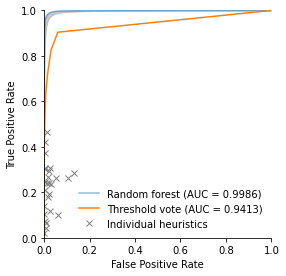

In [20]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(rf_fpr, rf_tpr, alpha=.5)
ax.plot(threshold_full_fpr, threshold_full_tpr)


for _x, _y in individual_heuristics:
    ax.plot(_x, _y, "x", color="0.5")

plt.axis("square")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


legend_labels = [
    "Random forest (AUC = {})".format(round(auc_score_rf, 4)),
    "Threshold vote (AUC = {})".format(round(auc_score_threshold, 4)),
    "Individual heuristics"
]
ax.legend(legend_labels, frameon=False)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.4,
                label=r'$\pm$ 1 std. dev.')

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig("figures/")

### Log-transformed combined plot using test set only

In [10]:
threshold_oob_tpr = np.load("data/threshold-vote-oob-tprs.npy")
threshold_oob_fpr = np.load("data/threshold-vote-oob-fprs.npy")

In [11]:
auc_score_threshold_oob = auc(threshold_oob_fpr, threshold_oob_tpr)
print(auc_score_threshold_oob)

0.9524305960856431


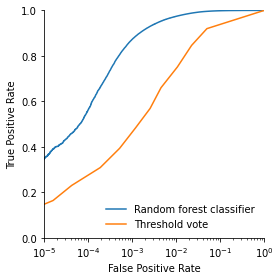

In [21]:
# Plot Out-of-bag manually
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(rf_fpr, rf_tpr)
ax.plot(threshold_oob_fpr, threshold_oob_tpr)
ax.set_ylim(0, 1)
ax.set_xlim(0.00001, 1)
ax.set_xscale("log")
legend_label = ["Random forest classifier", "Threshold vote"]
ax.legend(legend_label, frameon=False)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
sns.despine()
plt.tight_layout()
plt.savefig("figures/rf-vote-comparison.pdf")

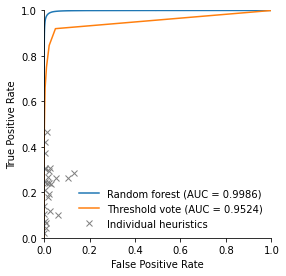

In [12]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(rf_fpr, rf_tpr)
ax.plot(threshold_oob_fpr, threshold_oob_tpr)


for _x, _y in individual_heuristics:
    ax.plot(_x, _y, "x", color="0.5")

plt.axis("square")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


legend_labels = [
    "Random forest (AUC = {})".format(round(auc_score_rf, 4)),
    "Threshold vote (AUC = {})".format(round(auc_score_threshold_oob, 4)),
    "Individual heuristics"
]
ax.legend(legend_labels, frameon=False)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig("figures/roc-with-individual-heuristics-oob-only.pdf")